## Test data of MaPSy

In [1]:
from keras.models import load_model
from concise.preprocessing import encodeDNA

import numpy as np
import pandas as pd
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
%matplotlib inline 

%load_ext autoreload
%autoreload 2

import mmsplice
from mmsplice.generic import logit, expit

def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

projectDIR = '../../data/'

Using TensorFlow backend.


In [2]:
dt = pd.read_csv(projectDIR + "/mapsy/CAGI_entire_file_testing_set_processed.txt")

In [3]:
dt.head()

,ID,WT_ID,MUT_ID,WT_SEQ,MUT_SEQ,Exon_Start,Vivo_WT_Input,chr,Exon_End,Vivo_MUT_Input,Vitro_WT_Input,Vitro_MUT_Input,donor,acceptor,strand,Exon_PhastCons,acceptor_intronL,donor_intronL,Exon_eng
0,chr1-109338855-109338994M_chr1-109338855-10933...,chr1-109338855-109338994M,chr1-109338855-109338994W,CTTATGCGAACGTGAAGATGTTTTTAACTAAAAAATGAATTTTGGT...,CTTATGCGAACGTGAAGATGTTTTTAACTAAAAAATGAATTTTGGT...,109338856,184,chr1,109338994,197,359,587,GTAATGGAGATAAT,AAAAATGAATTTTGGTTATAGATCACTGACAATATTTTATTTTCAT...,+,0.946870,1326,247,-78.8
1,chr1-114973419-114973534W_chr1-114973419-11497...,chr1-114973419-114973534W,chr1-114973419-114973534M,CTTATGCGAACGTGATAACAGTTGATGATTCAGAGACCTAGGATAA...,CTTATGCGAACGTGATAACAGTTGATGATTCAGAGACCTAGGATAA...,114973420,595,chr1,114973534,489,851,993,GTATGGTTCAAAGC,CAGAGACCTAGGATAAGTTGATAACCTAATGATGCATTTCTCTTAT...,-,0.999851,2704,2903,-31.8
2,chr1-1250899-1250994W_chr1-1250899-1250994M,chr1-1250899-1250994W,chr1-1250899-1250994M,CTTATGCGAACGTGACCCTCACTCCCCGCCCCTCTGCTGTGAGGAC...,CTTATGCGAACGTGACCCTCACTCCCCGCCCCTCTGCTGTGAGGAC...,1250900,786,chr1,1250998,777,770,730,GTCAGTGGAAGGGC,CGCCCCTCTGCTGTGAGGACACAGCCTGAGCGCAGCCCTGTCCTCC...,-,0.906347,538,81,-33.5
3,chr1-1250899-1250998W_chr1-1250899-1250998M,chr1-1250899-1250998W,chr1-1250899-1250998M,CTTATGCGAACGTGAGCCTCCCTCACTCCCCGCCCCTCTGCTGTGA...,CTTATGCGAACGTGAGCCTCCCTCACTCCCCGCCCCTCTGCTGTGA...,1250900,418,chr1,1250998,366,666,487,GTCAGTGGAAGGGC,CGCCCCTCTGCTGTGAGGACACAGCCTGAGCGCAGCCCTGTCCTCC...,-,0.906347,538,81,-65.3
4,chr1-144813741-144813844M_chr1-144813741-14481...,chr1-144813741-144813844M,chr1-144813741-144813844W,CTTATGCGAACGTGAGTAGGCAGTGACCACAGCAGCATGTCCAGCC...,CTTATGCGAACGTGAGTAGGCAGTGACCACAGCAGCATGTCCAGCC...,144813742,607,chr1,144813844,538,694,564,GTGAGGGGACCCCA,AGCAGCATGTCCAGCCTTCCACTGAGACAGGCGTGTCTGTCTTTTC...,+,0.012382,1784,835,-25.4


In [4]:
import sys
sys.path.append("../")
from utils import find_pos, find_seq_diff_pos

In [5]:
find_pos(dt.iloc[0]["WT_SEQ"], dt.iloc[0]["donor"])

170

In [6]:
dt['WT_Exon_End'] = dt.apply(lambda x: find_pos(x["WT_SEQ"], x["donor"]), axis=1)

dt['WT_Exon_Start'] = dt.apply(lambda x: find_pos(x["WT_SEQ"], x["acceptor"], start=False), axis=1)

GTAAGCCCTGCTAG
GTGTGATCCCAGGG
AGTAGATACTTAAAATACTTAGAATTTTTTTCTTCATTTTTCTCTTTAAG
GGATGGCAGATCCCTGAGACTTGGCTCTAATTCTGTCCTTAAAATGGCAG
TTTTTTTTCTTTTCTTTTCTTTTTTTTTTTTTTTTTTTGTCTTCTCCCAG


../utils.py:20: UserWarning: Cannot match full length short sequence GTAAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../utils.py:20: UserWarning: Cannot match full length short sequence GTGTG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../utils.py:20: UserWarning: Cannot match full length short sequence ATTTTTCTCTTTAAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../utils.py:20: UserWarning: Cannot match full length short sequence TCCTTAAAATGGCAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../utils.py:20: UserWarning: Cannot match full length short sequence TTTGTCTTCTCCCAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)


GATACGTGAGAATGTCATGAGGATCTAAAATATATTGCATACTTTTATAG
GATTTTCTTCCCAAAGAGTCAGACTTTAACAGAGTGCTTTTCTCCTACAG
CTTTGACACTTGAGTTATCTGGATTTGTCTTGTATTCTGTTTTCTCAAAG
GGTCCCGTAGTTATGTCTTGTAAATTAACTCTGTTCTTTCAATTCTTTAG


../utils.py:20: UserWarning: Cannot match full length short sequence TGCATACTTTTATAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../utils.py:20: UserWarning: Cannot match full length short sequence GCTTTTCTCCTACAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../utils.py:20: UserWarning: Cannot match full length short sequence TCTGTTTTCTCAAAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../utils.py:20: UserWarning: Cannot match full length short sequence CTTTCAATTCTTTAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)


In [7]:
dt['MUT_Exon_End'] = dt.apply(lambda x: find_pos(x["MUT_SEQ"], x["donor"]), axis=1)

dt['MUT_Exon_Start'] = dt.apply(lambda x: find_pos(x["MUT_SEQ"], x["acceptor"], start=False), axis=1)

GTAAGCCCTGCTAG
GTGTGATCCCAGGG
AGTAGATACTTAAAATACTTAGAATTTTTTTCTTCATTTTTCTCTTTAAG
GGATGGCAGATCCCTGAGACTTGGCTCTAATTCTGTCCTTAAAATGGCAG
TTTTTTTTCTTTTCTTTTCTTTTTTTTTTTTTTTTTTTGTCTTCTCCCAG


../utils.py:20: UserWarning: Cannot match full length short sequence GTAAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../utils.py:20: UserWarning: Cannot match full length short sequence GTGTG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../utils.py:20: UserWarning: Cannot match full length short sequence ATTTTTCTCTTTAAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../utils.py:20: UserWarning: Cannot match full length short sequence TCCTTAAAATGGCAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../utils.py:20: UserWarning: Cannot match full length short sequence TTTGTCTTCTCCCAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../utils.py:20: UserWarning: C

GATACGTGAGAATGTCATGAGGATCTAAAATATATTGCATACTTTTATAG
GATTTTCTTCCCAAAGAGTCAGACTTTAACAGAGTGCTTTTCTCCTACAG
CTTTGACACTTGAGTTATCTGGATTTGTCTTGTATTCTGTTTTCTCAAAG
GGTCCCGTAGTTATGTCTTGTAAATTAACTCTGTTCTTTCAATTCTTTAG


In [8]:
dt["MUT_POS"] = dt.apply(lambda x: find_seq_diff_pos(x["WT_SEQ"], x["MUT_SEQ"]), axis=1)

../utils.py:36: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  return find(muts)[0]


In [9]:
## distance to spice sites
dt['Dist_SS'] = dt.apply(lambda x: min(x['MUT_POS']-x["MUT_Exon_Start"], x["MUT_Exon_End"]-x['MUT_POS']), axis=1)

### Get feature sequence

In [10]:
dt.columns

Index(['ID', 'WT_ID', 'MUT_ID', 'WT_SEQ', 'MUT_SEQ', 'Exon_Start',
       'Vivo_WT_Input', 'chr', 'Exon_End', 'Vivo_MUT_Input', 'Vitro_WT_Input',
       'Vitro_MUT_Input', 'donor', 'acceptor', 'strand', 'Exon_PhastCons',
       'acceptor_intronL', 'donor_intronL', 'Exon_eng', 'WT_Exon_End',
       'WT_Exon_Start', 'MUT_Exon_End', 'MUT_Exon_Start', 'MUT_POS',
       'Dist_SS'],
      dtype='object')

In [11]:
acceptor_wt = dt.apply(lambda x: x['WT_SEQ'][x['WT_Exon_Start']-50 : x['WT_Exon_Start']+3], axis=1)

donor_wt = dt.apply(lambda x: x['WT_SEQ'][x['WT_Exon_End']-5 : x['WT_Exon_End']+13], axis=1)

In [12]:
acceptor_mut = dt.apply(lambda x: x['MUT_SEQ'][x['MUT_Exon_Start']-50 : x['MUT_Exon_Start']+3], axis=1)

donor_mut = dt.apply(lambda x: x['MUT_SEQ'][x['MUT_Exon_End']-5 : x['MUT_Exon_End']+13], axis=1)

In [13]:
exon_wt_seq = dt.apply(lambda x: x['WT_SEQ'][x['WT_Exon_Start'] : x['WT_Exon_End']], axis=1)
exon_mut_seq = dt.apply(lambda x: x['MUT_SEQ'][x['MUT_Exon_Start'] : x['MUT_Exon_End']], axis=1)

In [14]:
def label_region(mut_pos, exon_start, exon_end, left=3, right=5):
    """ left: how many bases of start of exon to be considered as acceptor region
    right: how many bases of end of exon to be considered as donor region
    """ 
    if mut_pos < exon_start + left:
        return 'acceptor'
    elif mut_pos > exon_end - right:
        return 'donor'
    else:
        return 'exon'

In [15]:
dt['REGION'] = dt.apply(lambda x: label_region(x["MUT_POS"], x["WT_Exon_Start"], x["WT_Exon_End"]), axis=1)

## Apply Model

In [16]:
exonM = load_model(mmsplice.EXON)

/opt/modules/i12g/anaconda/3-5.0.1/envs/splicing/lib/python3.6/site-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [17]:
exon_wt = exonM.predict_on_batch(encodeDNA(exon_wt_seq))

In [18]:
exon_mut = exonM.predict_on_batch(encodeDNA(exon_mut_seq))

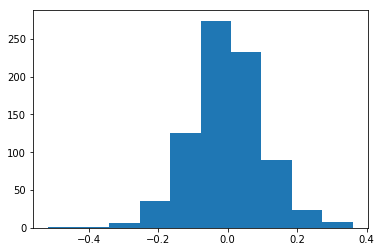

In [19]:
plt.hist(exon_mut - exon_wt)
plt.show()

In [20]:
donorM = load_model(mmsplice.DONOR)

In [21]:
donor_wt = donorM.predict_on_batch(encodeDNA(donor_wt))
donor_mut = donorM.predict_on_batch(encodeDNA(donor_mut))

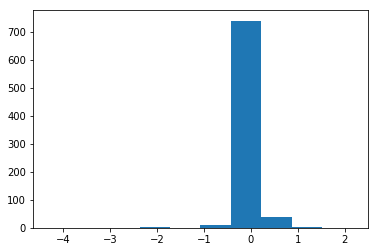

In [22]:
plt.hist(logit(donor_mut) - logit(donor_wt))
plt.show()

In [23]:
acceptorM = load_model(mmsplice.ACCEPTOR)

In [24]:
acceptor_wt = acceptorM.predict_on_batch(encodeDNA(acceptor_wt))
acceptor_mut = acceptorM.predict_on_batch(encodeDNA(acceptor_mut))

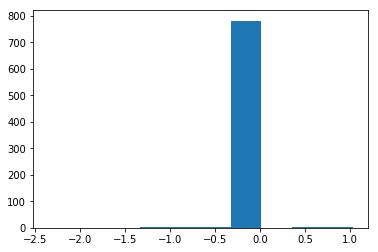

In [25]:
plt.hist(logit(acceptor_mut) - logit(acceptor_wt))
plt.show()

## Huber regression 

In [26]:
X_vivo = np.concatenate([logit(acceptor_mut)-logit(acceptor_wt), exon_mut-exon_wt, logit(donor_mut)-logit(donor_wt)], axis=1)

exon_overlap = np.logical_or(np.logical_and(X_vivo[:,0]!=0, X_vivo[:,1]!=0), np.logical_and(X_vivo[:,1]!=0, X_vivo[:,2]!=0))
X_vivo = np.hstack([X_vivo, (X_vivo[:,1]*exon_overlap).reshape(-1,1)])

In [27]:
X_vitro = np.concatenate([logit(acceptor_mut)-logit(acceptor_wt), exon_mut-exon_wt], axis=1)

exon_overlap = np.logical_and(X_vitro[:,0]!=0, X_vitro[:,1]!=0)
X_vitro = np.hstack([X_vitro, (X_vitro[:,1]*exon_overlap).reshape(-1,1)])

### Predict log2 mut/ref

In [28]:
import joblib
huber_vivo = joblib.load(projectDIR + 'mapsy/vivo_model.pkl')
huber_vitro = joblib.load(projectDIR + 'mapsy/vitro_model.pkl')

In [29]:
vivo_pred = huber_vivo.predict(X_vivo)
vitro_pred = huber_vitro.predict(X_vitro)

### Write the results

In [30]:
dt.columns

Index(['ID', 'WT_ID', 'MUT_ID', 'WT_SEQ', 'MUT_SEQ', 'Exon_Start',
       'Vivo_WT_Input', 'chr', 'Exon_End', 'Vivo_MUT_Input', 'Vitro_WT_Input',
       'Vitro_MUT_Input', 'donor', 'acceptor', 'strand', 'Exon_PhastCons',
       'acceptor_intronL', 'donor_intronL', 'Exon_eng', 'WT_Exon_End',
       'WT_Exon_Start', 'MUT_Exon_End', 'MUT_Exon_Start', 'MUT_POS', 'Dist_SS',
       'REGION'],
      dtype='object')

In [31]:
from collections import OrderedDict

In [32]:
results = OrderedDict([('Wildtype_id', dt.WT_ID), 
          ('Mutant_id', dt.MUT_ID),
          ('vivo_wildtype_spliced', dt.Vivo_WT_Input),
          ('vivo_mutant_spliced', dt.Vivo_MUT_Input),
          ('vitro_wildtype_spliced', dt.Vitro_WT_Input),
          ('vitro_mutant_spliced', dt.Vitro_MUT_Input),
          ('log2_vivo_allele_ratio', vivo_pred),
          ('log2_vitro_allele_ratio', vitro_pred)])

In [33]:
mapsy_test_pred = pd.DataFrame.from_dict(results)

In [34]:
mapsy_test_pred.head()

,Wildtype_id,Mutant_id,vivo_wildtype_spliced,vivo_mutant_spliced,vitro_wildtype_spliced,vitro_mutant_spliced,log2_vivo_allele_ratio,log2_vitro_allele_ratio
0,chr1-109338855-109338994M,chr1-109338855-109338994W,184,197,359,587,-0.122903,-0.091725
1,chr1-114973419-114973534W,chr1-114973419-114973534M,595,489,851,993,0.150041,0.194460
2,chr1-1250899-1250994W,chr1-1250899-1250994M,786,777,770,730,-0.517884,-0.505868
3,chr1-1250899-1250998W,chr1-1250899-1250998M,418,366,666,487,-0.517885,-0.505870
4,chr1-144813741-144813844M,chr1-144813741-144813844W,607,538,694,564,-0.605788,-0.598037


In [35]:
mapsy_test_pred.to_csv("/data/ouga/home/ag_gagneur/chengju/project/recods/Data/MaPSy/mapsy_test_pred.txt",
                 sep='\t', index=False, float_format='%.17f', encoding='utf-8')